# MODELOS

## Librerias

In [1]:
### Cargar paquetes
import pandas as pd ### para manejo de datos
import sqlite3 as sql
import Funciones as funciones  ###archivo de funciones profe
from sklearn import linear_model ## para regresión lineal
from sklearn import tree ###para ajustar arboles de decisión
from sklearn.ensemble import RandomForestRegressor ##Ensamble con bagging
from sklearn.ensemble import GradientBoostingRegressor ###Ensamble boosting
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt ### gráficos
from sklearn.model_selection import RandomizedSearchCV
import joblib  ### para guardar modelos
from sklearn.preprocessing import StandardScaler ## escalar variables 

## Datos

In [2]:
#Traer base de datos
df_final=("DATA/df_final.csv")  
df_final=pd.read_csv(df_final)
### Selección de variables ###
df = df_final.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeID               4410 non-null   int64  
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

## Imputación de variables

In [3]:
#### imputación para variables categóricas y numéricas
##se separan columnas categóricas o que se quieran tratar así de las numéricas

list_cat=['BusinessTravel', 'Department', 'Gender', 
          'JobRole', 'MaritalStatus', 'EducationField','retirementDate', 'resignationReason']

df1=funciones.imputar_f(df,list_cat)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BusinessTravel     4410 non-null   object
 1   Department         4410 non-null   object
 2   Gender             4410 non-null   object
 3   JobRole            4410 non-null   object
 4   MaritalStatus      4410 non-null   object
 5   EducationField     4410 non-null   object
 6   retirementDate     4410 non-null   object
 7   resignationReason  4410 non-null   object
dtypes: object(8)
memory usage: 275.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   float64
 1   DistanceFromHome         4410 non-null   float64
 2   Education                4410 non-null   float64
 3   

## Conversión a dummies

In [4]:
# convertir las variables categoricas en dummies
list_dummies=['BusinessTravel', 'Department', 'Gender', 
          'JobRole', 'MaritalStatus', 'EducationField','retirementDate', 'resignationReason']


df_dummies=pd.get_dummies(df1,columns=list_dummies)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 412 entries, Age to resignationReason_Stress
dtypes: bool(392), float64(20)
memory usage: 2.3 MB


## Selección de variables

In [5]:
y=df_dummies.Attrition
X1= df_dummies.loc[:,~df_dummies.columns.isin(['Attrition','EmployeeID'])]

scaler=StandardScaler()
scaler.fit(X1)
X2=scaler.transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)

m_lreg = linear_model.LinearRegression()
m_rtree=tree.DecisionTreeRegressor()
m_rf= RandomForestRegressor()
m_gbt=GradientBoostingRegressor()

modelos=list([m_lreg,m_rtree, m_rf, m_gbt])

var_names=funciones.sel_variables(modelos,X,y,threshold="2.5*mean") #No funciona con Vector machine
var_names.shape

(7,)

## Matriz con variables seleccionadas

In [6]:
X2=X[var_names] 
X2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EducationField_Life Sciences     4410 non-null   float64
 1   EducationField_Marketing         4410 non-null   float64
 2   EducationField_Medical           4410 non-null   float64
 3   EducationField_Technical Degree  4410 non-null   float64
 4   Gender_Female                    4410 non-null   float64
 5   Gender_Male                      4410 non-null   float64
 6   retirementDate_0                 4410 non-null   float64
dtypes: float64(7)
memory usage: 241.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 410 entries, Age to resignationReason_Stress
dtypes: float64(410)
memory usage: 13.8 MB


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 410 entries, Age to resignationReason_Stress
dtypes: float64(410)
memory usage: 13.8 MB


## Modelo K fold cross validation
#### con base full y con variables seleccionadas

rl       -2.213321e-01
dt        0.000000e+00
rf        0.000000e+00
gb       -9.767525e-06
rl_Sel   -1.470442e-15
dt_sel    0.000000e+00
rf_sel    0.000000e+00
gb_Sel   -9.767525e-06
dtype: float64

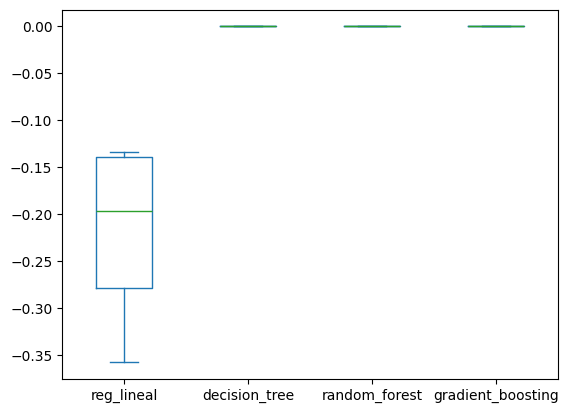

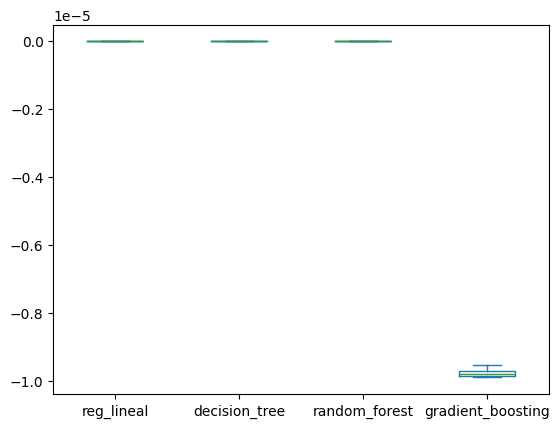

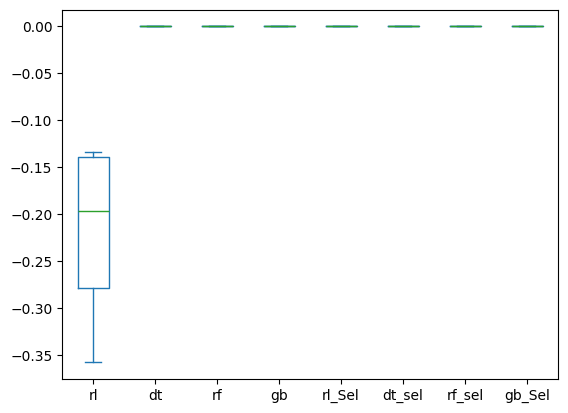

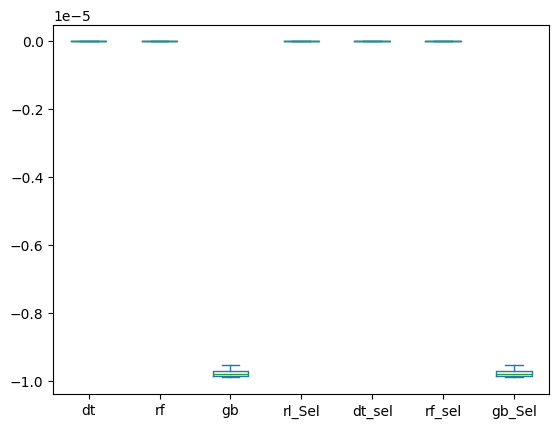

In [8]:
rmse_df=funciones.medir_modelos(modelos,"neg_root_mean_squared_error",X,y,4) ## base con todas las variables #4: Número de grupos en que va a separar los datos para realizar el cross validation
rmse_varsel=funciones.medir_modelos(modelos,"neg_root_mean_squared_error",X2,y,4) ### base con variables seleccionadas


rmse=pd.concat([rmse_df,rmse_varsel],axis=1)
rmse.columns=['rl', 'dt', 'rf', 'gb',
       'rl_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']


rmse_df.plot(kind='box') #### gráfico para modelos todas las varibles
rmse_varsel.plot(kind='box') ### gráfico para modelo variables seleccionadas
rmse.plot(kind='box') ### gráfico para modelos sel y todas las variables

rmse2=rmse[ ['dt', 'rf', 'gb','rl_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']]
rmse2.plot(kind='box') ### gráfico para modelos sel y todas las variables

rmse.mean() ### medias de mape

## Tuneo de hiperparametros

In [9]:
param_grid = [{'n_estimators': [3, 500, 100], 'max_features': [5,20],
               'min_samples_split': [100, 20, 5]}]

tun_rf=RandomizedSearchCV(m_rf,param_distributions=param_grid,n_iter=6,scoring="neg_root_mean_squared_error")
tun_rf.fit(X2,y)
### se comenta porque toma mucho tiempo en ejecutar

pd.set_option('display.max_colwidth', 100)
resultados=tun_rf.cv_results_
tun_rf.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

rf_final=tun_rf.best_estimator_ ### Guardar el modelo con hyperparameter tunning
m_lreg=m_lreg.fit(X2,y)

## Exportación del proyecto

In [ ]:
joblib.dump(df_final, "salidas\\rf_final.pkl") ## 
joblib.dump(m_lreg, "salidas\\m_lreg.pkl") ## 
joblib.dump(list_cat, "salidas\\list_cat.pkl") ### para realizar imputacion
joblib.dump(list_dummies, "salidas\\list_dummies.pkl")  ### para convertir a dummies
joblib.dump(var_names, "salidas\\var_names.pkl")  ### para variables con que se entrena modelo
joblib.dump(scaler, "salidas\\scaler.pkl") ## 



### funcion para cargar objeto guardado ###
rf_final = joblib.load("salidas\\rf_final.pkl")
m_lreg = joblib.load("salidas\\m_lreg.pkl")
list_cat=joblib.load("salidas\\list_cat.pkl")
list_dummies=joblib.load("salidas\\list_dummies.pkl")
var_names=joblib.load("salidas\\var_names.pkl")
scaler=joblib.load("salidas\\scaler.pkl") 

## Evaluación
#### Métrica de entrenamiento y  para mirar sobre ajuste

In [10]:
eval=cross_validate(rf_final,X2,y,cv=5,scoring="neg_root_mean_squared_error",return_train_score=True)
eval2=cross_validate(m_lreg,X2,y,cv=5,scoring="neg_root_mean_squared_error",return_train_score=True)

## Resultados para RF y RL

In [11]:
#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para RF
train_rf=pd.DataFrame(eval['train_score'])
test_rf=pd.DataFrame(eval['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']

#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para RL
train_rl=pd.DataFrame(eval2['train_score'])
test_rl=pd.DataFrame(eval2['test_score'])
train_test_rl=pd.concat([train_rl, test_rl],axis=1)
train_test_rl.columns=['train_score','test_score']

In [12]:
train_test_rl["test_score"].mean()
train_test_rf["test_score"].mean()

0.0

## Comparación con predicciones actuales

In [13]:
mse=mean_squared_error(df['perf_2023'], df['perf_2022'])
rmse= mse**(0.5)

KeyError: 'perf_2023'

## Distribución de los errore

In [14]:
predictions=cross_val_predict(m_lreg,X2,y,cv=5)

pred=pd.DataFrame(predictions,columns=['pred'])
pdy=y.to_frame()
error=pdy['perf_2023']-pred['pred']

error.hist(bins=50, grid=False)



plt.boxplot(error,vert=False)
plt.show()



predictions2=cross_val_predict(rf_final,X2,y,cv=5)

pred2=pd.DataFrame(predictions2,columns=['pred'])
error2=pdy['perf_2023']-pred2['pred']
error2.hist(bins=50, grid=False)


plt.boxplot(error2,vert=False)
plt.show()


KeyError: 'perf_2023'

## Importancia de variables

In [ ]:
pd.set_option('display.max_rows', 100)
importancia1=pd.DataFrame( m_lreg.feature_names_in_)
importancia2=pd.DataFrame(m_lreg.coef_)
importancia=pd.concat([importancia1,importancia2],axis=1)
importancia.columns=["variable","peso"]
importancia.sort_values('peso')


importancia.sort_values(by=["peso"], ascending=False)
importancia.to_excel("salidas\\feature_importances.xlsx")
m_lreg.predict(X2[X2.index==0])